### Finding lat/lon coordinates in mass shootings file

In [1]:
import pandas as pd
from config import api_key
from config import gkey
import requests
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

---

#### Retrieving coordinates for mass shootings file

In [2]:
#=====================================================================================
#=====================================================================================

# DO NOT RE-RUN THIS CELL. DATA HAS ALREADY BEEN GATHERED AND SAVED TO A NEW CSV FILE.

#=====================================================================================
#=====================================================================================

# data = pd.read_csv('CleanDatasets/mass_shooting_full_data.csv')
# lat_lon_df = data[['Year','State','City Or County']]
# lat_lon_df['Latitude'] = ''
# lat_lon_df['Longitude'] = ''
# lat_lon_df.head()

,Year,State,City Or County,Latitude,Longitude
0,2014,Louisiana,New Orleans,,
1,2014,California,Los Angeles,,
2,2014,California,Sacramento,,
3,2014,Illinois,East St. Louis,,
4,2014,Missouri,Saint Louis,,


In [9]:
#=====================================================================================
#=====================================================================================

# DO NOT RE-RUN THIS CELL. DATA HAS ALREADY BEEN GATHERED AND SAVED TO A NEW CSV FILE.

#=====================================================================================
#=====================================================================================

# params = {'key':gkey}
# counter = 1

# for index, row in lat_lon_df.iterrows():
#     url = 'https://maps.googleapis.com/maps/api/geocode/json?'
    
#     city = row['City Or County']
#     state = row['State']
#     params['address'] = f'{city},{state}'
    
#     r = requests.get(url, params=params).json()
    
#     lat_lon_df.loc[index, "Latitude"] = r["results"][0]["geometry"]["location"]["lat"]
#     lat_lon_df.loc[index, "Longitude"] = r["results"][0]["geometry"]["location"]["lng"]

#     print('Processing request ' + str(counter))
#     counter += 1

# print('-'*15)
# print('Process Completed')

Processing request 1
Processing request 2
Processing request 3
Processing request 4
Processing request 5
Processing request 6
Processing request 7
Processing request 8
Processing request 9
Processing request 10
Processing request 11
Processing request 12
Processing request 13
Processing request 14
Processing request 15
Processing request 16
Processing request 17
Processing request 18
Processing request 19
Processing request 20
Processing request 21
Processing request 22
Processing request 23
Processing request 24
Processing request 25
Processing request 26
Processing request 27
Processing request 28
Processing request 29
Processing request 30
Processing request 31
Processing request 32
Processing request 33
Processing request 34
Processing request 35
Processing request 36
Processing request 37
Processing request 38
Processing request 39
Processing request 40
Processing request 41
Processing request 42
Processing request 43
Processing request 44
Processing request 45
Processing request 

Processing request 362
Processing request 363
Processing request 364
Processing request 365
Processing request 366
Processing request 367
Processing request 368
Processing request 369
Processing request 370
Processing request 371
Processing request 372
Processing request 373
Processing request 374
Processing request 375
Processing request 376
Processing request 377
Processing request 378
Processing request 379
Processing request 380
Processing request 381
Processing request 382
Processing request 383
Processing request 384
Processing request 385
Processing request 386
Processing request 387
Processing request 388
Processing request 389
Processing request 390
Processing request 391
Processing request 392
Processing request 393
Processing request 394
Processing request 395
Processing request 396
Processing request 397
Processing request 398
Processing request 399
Processing request 400
Processing request 401
Processing request 402
Processing request 403
Processing request 404
Processing 

Processing request 719
Processing request 720
Processing request 721
Processing request 722
Processing request 723
Processing request 724
Processing request 725
Processing request 726
Processing request 727
Processing request 728
Processing request 729
Processing request 730
Processing request 731
Processing request 732
Processing request 733
Processing request 734
Processing request 735
Processing request 736
Processing request 737
Processing request 738
Processing request 739
Processing request 740
Processing request 741
Processing request 742
Processing request 743
Processing request 744
Processing request 745
Processing request 746
Processing request 747
Processing request 748
Processing request 749
Processing request 750
Processing request 751
Processing request 752
Processing request 753
Processing request 754
Processing request 755
Processing request 756
Processing request 757
Processing request 758
Processing request 759
Processing request 760
Processing request 761
Processing 

Processing request 1073
Processing request 1074
Processing request 1075
Processing request 1076
Processing request 1077
Processing request 1078
Processing request 1079
Processing request 1080
Processing request 1081
Processing request 1082
Processing request 1083
Processing request 1084
Processing request 1085
Processing request 1086
Processing request 1087
Processing request 1088
Processing request 1089
Processing request 1090
Processing request 1091
Processing request 1092
Processing request 1093
Processing request 1094
Processing request 1095
Processing request 1096
Processing request 1097
Processing request 1098
Processing request 1099
Processing request 1100
Processing request 1101
Processing request 1102
Processing request 1103
Processing request 1104
Processing request 1105
Processing request 1106
Processing request 1107
Processing request 1108
Processing request 1109
Processing request 1110
Processing request 1111
Processing request 1112
Processing request 1113
Processing reque

Processing request 1415
Processing request 1416
Processing request 1417
Processing request 1418
Processing request 1419
Processing request 1420
Processing request 1421
Processing request 1422
Processing request 1423
Processing request 1424
Processing request 1425
Processing request 1426
Processing request 1427
Processing request 1428
Processing request 1429
Processing request 1430
Processing request 1431
Processing request 1432
Processing request 1433
Processing request 1434
Processing request 1435
Processing request 1436
Processing request 1437
Processing request 1438
Processing request 1439
Processing request 1440
Processing request 1441
Processing request 1442
Processing request 1443
Processing request 1444
Processing request 1445
Processing request 1446
Processing request 1447
Processing request 1448
Processing request 1449
Processing request 1450
Processing request 1451
Processing request 1452
Processing request 1453
Processing request 1454
Processing request 1455
Processing reque

In [14]:
#=====================================================================================
#=====================================================================================

# DO NOT RE-RUN THIS CELL. DATA HAS ALREADY BEEN GATHERED AND SAVED TO A NEW CSV FILE.

#=====================================================================================
#=====================================================================================

# lat_lon_df.to_csv('CleanDatasets/mass_shooting_coordinates_BACKUP.csv', index=False)

In [2]:
lat_lon_data = pd.read_csv('CleanDatasets/mass_shooting_coordinates.csv')

In [3]:
grouped_year = lat_lon_data[['Year','Latitude','Longitude','State']]
grouped_year = grouped_year[grouped_year['State'] != 'Alaska']
grouped_year = grouped_year.groupby(['Year','Latitude','Longitude']).count()
grouped_year = grouped_year.reset_index()
grouped_year = grouped_year.set_index('Year')
grouped_year.head()

,Latitude,Longitude,State
Year,,,
2014,25.761680,-80.191790,6
2014,26.684510,-80.667558,1
2014,27.336435,-82.530653,1
2014,27.673923,-97.278879,1
2014,27.950575,-82.457178,2


In [4]:
data2014 = grouped_year.loc[2014]
data2015 = grouped_year.loc[2015]
data2016 = grouped_year.loc[2016]
data2017 = grouped_year.loc[2017]
data2018 = grouped_year.loc[2018]

In [5]:
us_cities = pd.read_csv('RawDatasets/uscitiesv1.5.csv')
us_cities = us_cities[['state_name','lat','lng']]
us_cities.head()

,state_name,lat,lng
0,Washington,47.1443,-122.1408
1,Washington,48.5602,-122.4311
2,Washington,46.6085,-121.6702
3,Washington,47.5862,-122.5482
4,Washington,47.5207,-122.5196


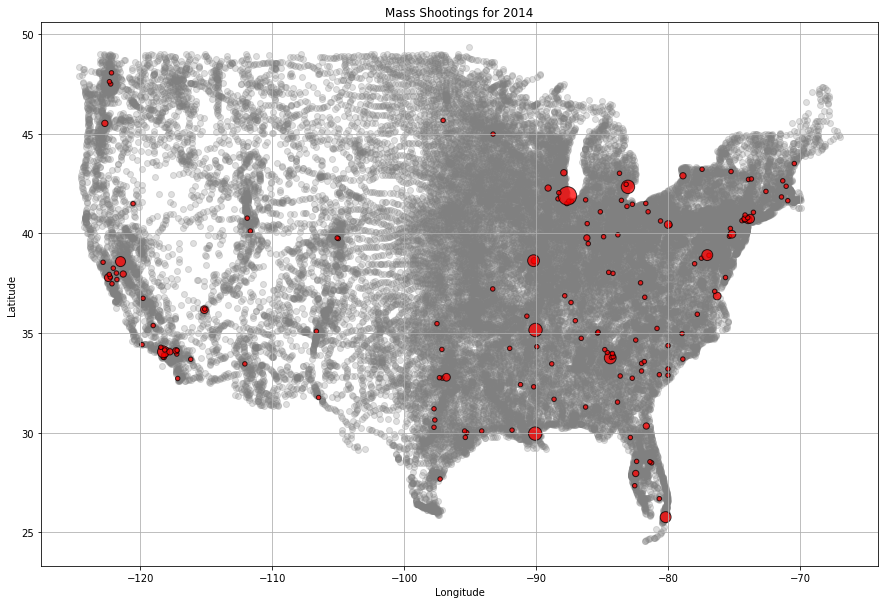

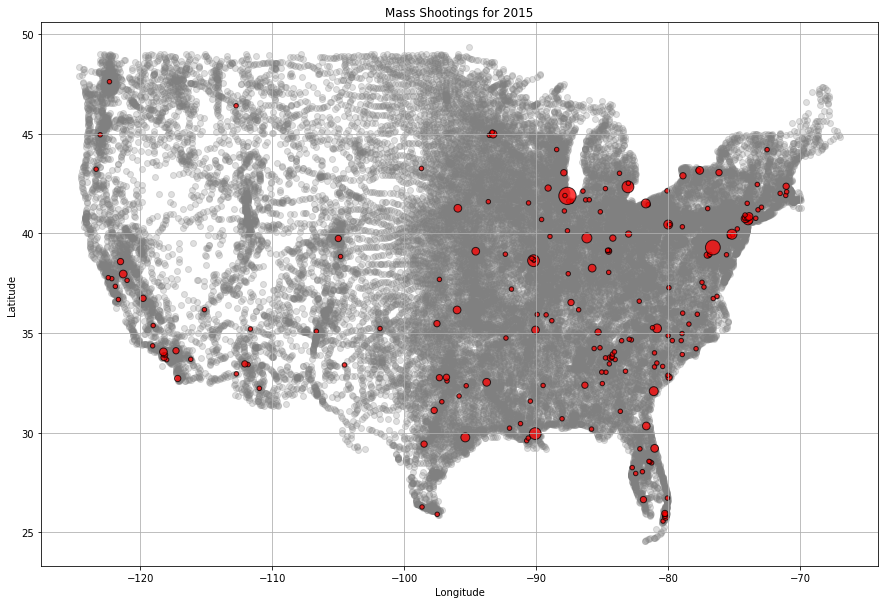

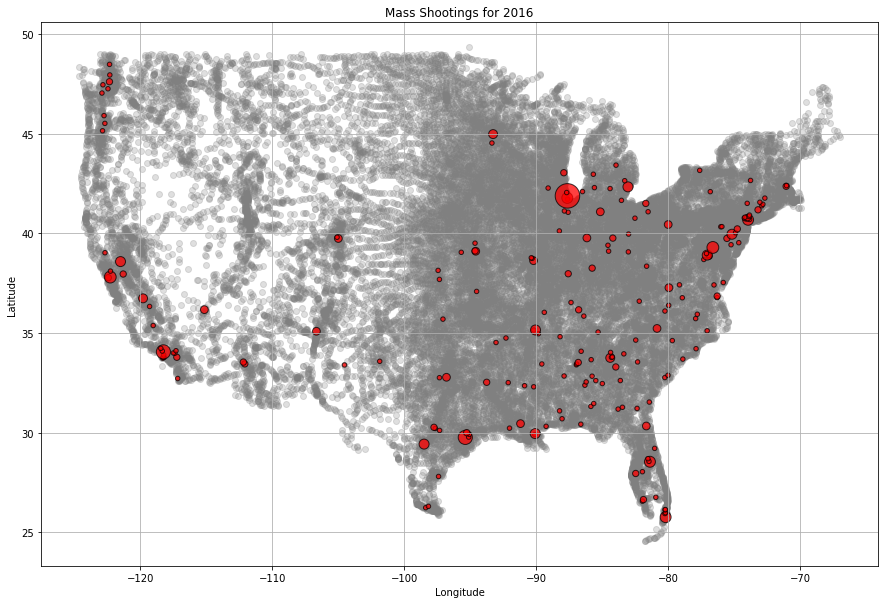

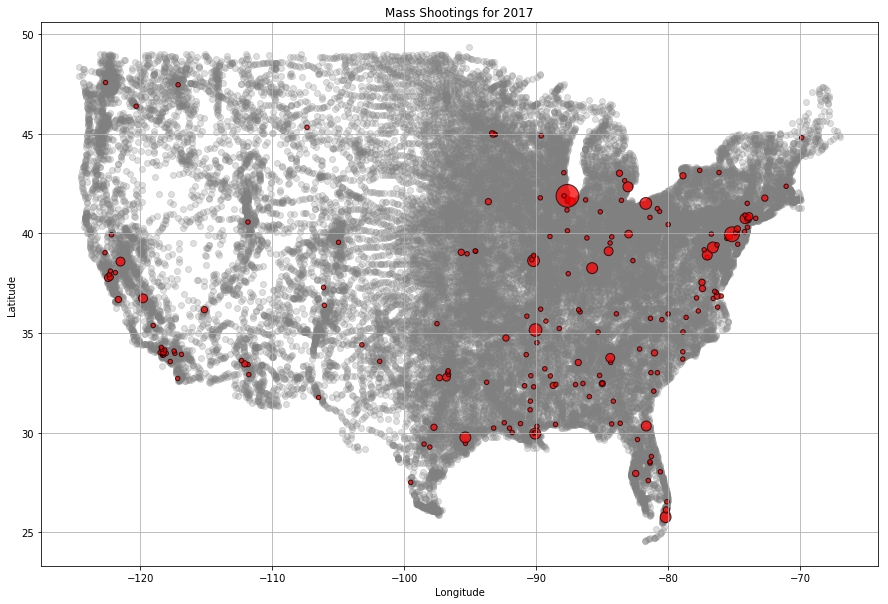

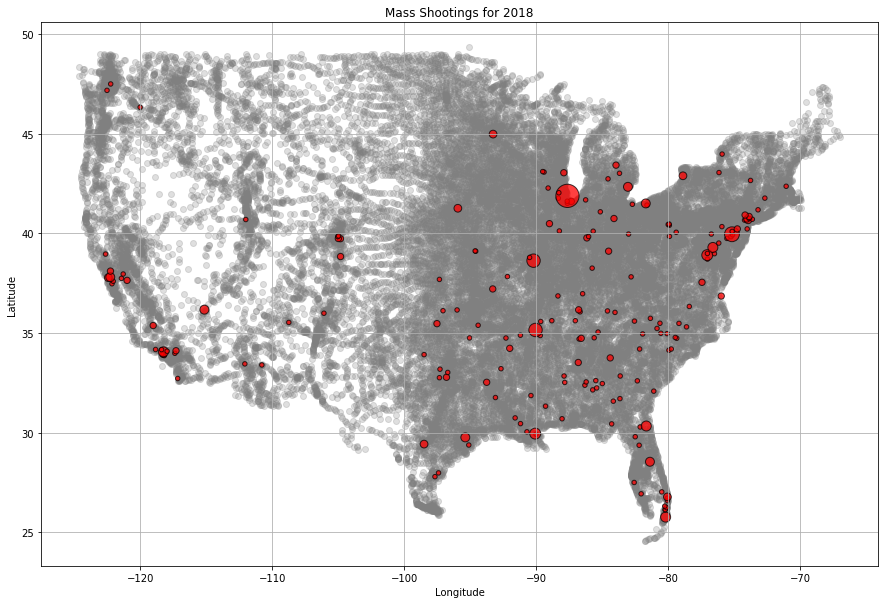

In [6]:
year_frames = [data2014,data2015,data2016,data2017,data2018]
start = 2014

for year in year_frames:
    shooting_lng = year['Longitude']
    shooting_lat = year['Latitude']
    all_lon = us_cities['lng']
    all_lat = us_cities['lat']
    size = year['State']

    fig, ax = plt.subplots(figsize=(15,10))

    ax.scatter(all_lon, all_lat, color='gray', alpha=.25)
    
    ax.scatter(shooting_lng, shooting_lat, s=size*20, color='red', alpha=.75, edgecolors='black')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mass Shootings for ' + str(start))
    plt.grid()

    plt.savefig(f'Figures/Coordinates_Figures/shooting_map_{start}.png')
    start += 1